In [1]:
# author: Matt Myers, 3/6/2019
# regularization examples adapted from https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
rcParams['figure.figsize'] = 12, 10

## x = angle in radians, y = sin(x) + noise


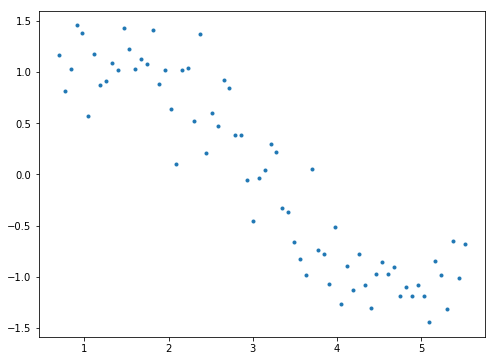

In [2]:
x = np.array([i*np.pi/180 for i in range(40,320,4)])
np.random.seed(0)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.3,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

plt.figure(figsize=(8,6))
plt.plot(data['x'],data['y'],'.')

## Add nonlinear predictors (powers of x)

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x^%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,0.698132,1.172003,0.487388,0.340261,0.237547,0.165839,0.115777,0.080828,0.056429,0.039395,0.027503,0.019200,0.013404,0.009358,0.006533,0.004561
1,0.767945,0.814706,0.589739,0.452887,0.347792,0.267085,0.205107,0.157511,0.120960,0.092890,0.071335,0.054781,0.042069,0.032307,0.024810,0.019052
2,0.837758,1.036766,0.701839,0.587971,0.492577,0.412661,0.345710,0.289621,0.242632,0.203267,0.170289,0.142661,0.119515,0.100125,0.083880,0.070271
3,0.907571,1.460279,0.823686,0.747553,0.678458,0.615749,0.558836,0.507183,0.460305,0.417760,0.379147,0.344102,0.312298,0.283432,0.257235,0.233459
4,0.977384,1.389305,0.955280,0.933676,0.912560,0.891922,0.871751,0.852036,0.832766,0.813933,0.795525,0.777534,0.759950,0.742763,0.725965,0.709547


## Fit linear regression

In [4]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


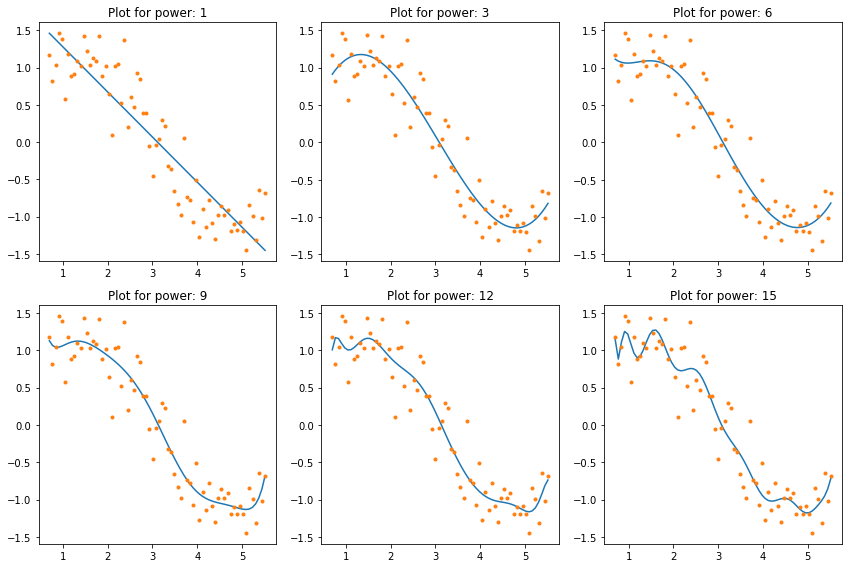

In [5]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

plt.figure(figsize=(12,8))

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [6]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
model_pow_1,9.9,1.9,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,9.9,2,-0.68,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,5.7,-0.12,2.1,-1,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,5.7,0.34,1.3,-0.5,-0.012,0.0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,5.6,1.6,-1.9,2.1,-1,0.18,-0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,5.5,2.5,-4.5,5,-2.5,0.6,-0.068,0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,5.5,-1.8,11,-15,11,-4.7,1.1,-0.13,0.0059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,5.4,7.2,-25,42,-38,19,-6.1,1.1,-0.12,0.0049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,5.4,12,-48,84,-79,45,-16,3.5,-0.47,0.035,-0.0011,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,5.4,-23,1.3e+02,-2.9e+02,3.6e+02,-2.8e+02,1.4e+02,-44,9.3,-1.2,0.093,-0.003,NaN,NaN,NaN,NaN,NaN


## Ridge regression (L2 penalty)

In [7]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.006291e-17
  overwrite_a=True).T


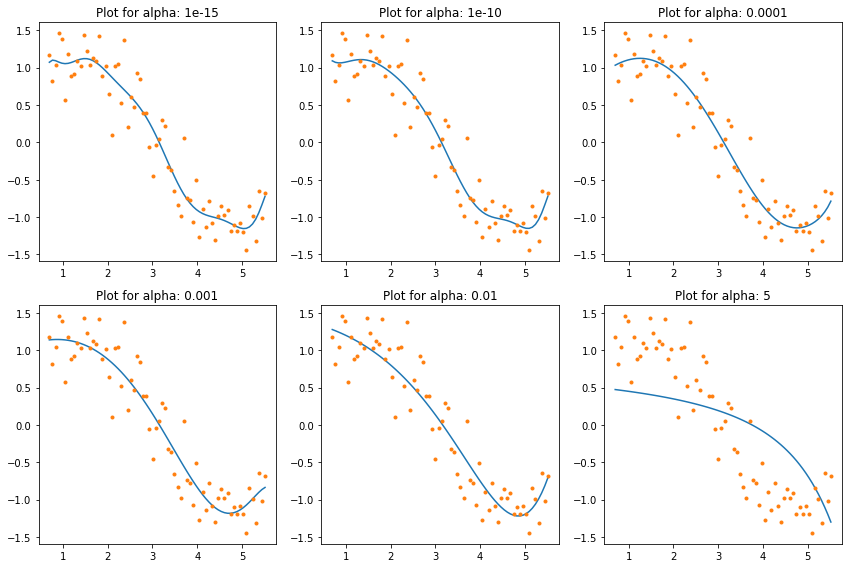

In [8]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x^%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

plt.figure(figsize=(12,8))
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [9]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [10]:
for alpha in coef_matrix_ridge.index:
    print(alpha, "\t", sum([1 for x in coef_matrix_ridge.loc[alpha,] if x == 0]))

alpha_1e-15 	 0
alpha_1e-10 	 0
alpha_1e-08 	 0
alpha_0.0001 	 0
alpha_0.001 	 0
alpha_0.01 	 0
alpha_1 	 0
alpha_5 	 0
alpha_10 	 0
alpha_20 	 0


## Lasso regression (L1 penalty)

In [11]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

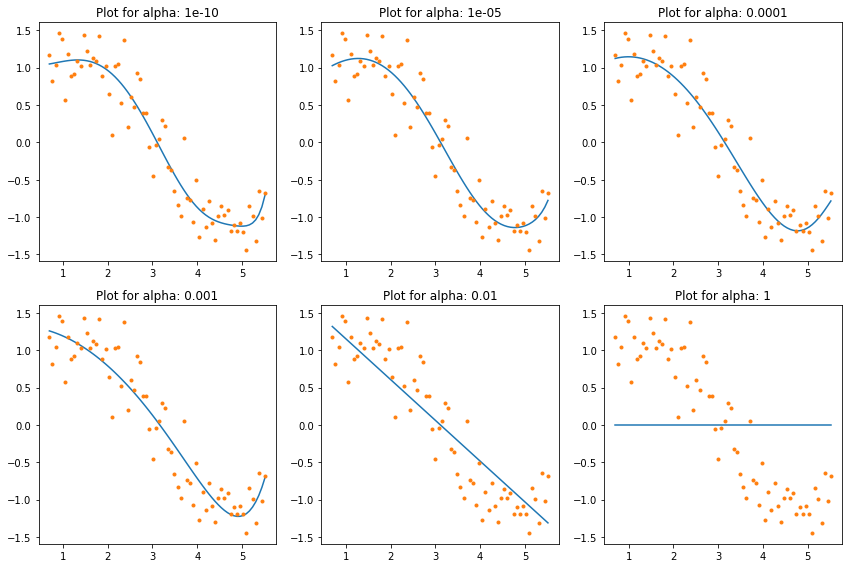

In [12]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x^%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

plt.figure(figsize=(12,8))

# Filter out ConvergenceWarning (we'll see if it really doesn't converge)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #Iterate over the 10 alpha values:
    for i in range(10):
        coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [13]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001     9
alpha_0.001     12
alpha_0.01      14
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

## Use cross-validation to choose the best alpha

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {"alpha":[pow(10, x) for x in range(-3, 3)]}
estimator = Lasso(max_iter=5000)
cv = GridSearchCV(estimator, parameters, cv=5, scoring='r2')
cv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [15]:
# Filter out ConvergenceWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cv.fit(data, y)
cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# Filter out ConvergenceWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    coef = cv.best_estimator_.fit(data, y).coef_
coef

array([-0.00000000e+00,  9.88296258e-01, -0.00000000e+00, -0.00000000e+00,
       -2.26936950e-04,  1.18650127e-05,  4.31416089e-06,  4.03276523e-07,
        2.00594061e-08, -2.50042747e-09, -9.93988465e-10, -1.96137637e-10,
       -2.78970607e-11, -2.43092870e-12,  1.63560122e-13,  1.49527978e-13])

## Another example of CV and grid search

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# Load one of the sklearn sample datasets, with the optional argument to return it as a tuple
X, y = load_diabetes(return_X_y = True)

X.shape, X[0], y[0]

((442, 10),
 array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]),
 151.0)

In [18]:
parameters = {"n_estimators":[10, 25, 50, 100], 
              "max_depth":list(range(1, 5)), 
              "max_features":['auto', 'sqrt', 'log2']}

rf = RandomForestRegressor(random_state=0)
cv = GridSearchCV(rf, parameters, cv=5, scoring='r2')
cv.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_depth': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [19]:
best_rf = cv.best_estimator_
best_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# Note: using all of the data like this, rather than splitting test and train, is not a valid approach in most contexts
features = ["Age", "Sex", "BMI", "Blood pressure"] + ["Blood test %d" % i for i in range(1,7)]
importances = best_rf.fit(X, y).feature_importances_
for i in range(len(features)):
    print(features[i], "\t", importances[i])

Age 	 0.023499024950722928
Sex 	 0.0051530273685639815
BMI 	 0.3104260226584512
Blood pressure 	 0.10948320932235722
Blood test 1 	 0.02540839905147572
Blood test 2 	 0.029218499031269073
Blood test 3 	 0.05927891857060536
Blood test 4 	 0.09451126653344918
Blood test 5 	 0.26091916523588576
Blood test 6 	 0.08210246727721959
